## Setup

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
def B_vs_V(x:np.array, y1:np.array, y2:np.array, y3:np.array):
    """plots y1, y2, and y3 vs x and returns the corresponding slopes"""
    index = x != 0 # Indexes for which v is non-zero
    x, y1, y2, y3 = x[index], y1[index], y2[index], y3[index] # Values for which v is non-zero

    # Plot
    fig, ax = plt.subplots()
    ax.plot(x, y1, label=r'$B_x$', linewidth=4.0)
    ax.plot(x, y2, label=r'$B_y$', linewidth=4.0)
    ax.plot(x, y3, label=r'$B_z$', linewidth=4.0)

    ax.set_ylabel('Field (arb. u.)' )
    #ax.set_xlim(0,1)
    ax.legend(loc=0)
    ax.grid()
    return ax

## Plot field for individual poles

In [3]:
#Training data
df = pd.read_csv('data/nl_individual_calibration_set.csv')

Bx, By, Bz = df['B_x'].to_numpy(), df['B_y'].to_numpy(), df['B_z'].to_numpy() # Extract fields
V1, V2, V3 = df['V_1'].to_numpy(), df['V_2'].to_numpy(), df['V_3'].to_numpy()  # Extract voltages

Text(0.5, 0, '$V_3$ (arb. u.)')

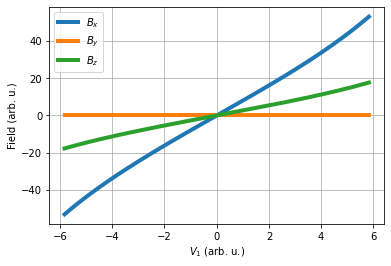

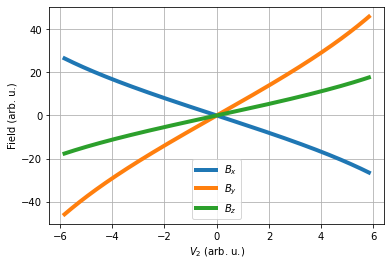

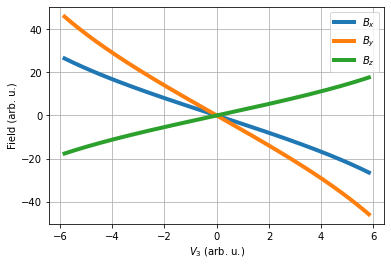

In [4]:
ax1 = B_vs_V(V1, Bx, By, Bz)
ax1.set_xlabel(r'$V_1$ (arb. u.)')

ax2 = B_vs_V(V2, Bx, By, Bz)
ax2.set_xlabel(r'$V_2$ (arb. u.)')

ax3 = B_vs_V(V3, Bx, By, Bz)
ax3.set_xlabel(r'$V_3$ (arb. u.)')

## 'Deep' learning

### Load and prepare data

In [5]:
# Training data
df_train = pd.read_csv('data/full_calibration_set.csv')
V_train = df_train[['V_1', 'V_2', 'V_3']]
B_train = df_train[['B_x', 'B_y', 'B_z']]

# Validation data
df_val = pd.read_csv('data/validation_set.csv')
V_val = df_val[['V_1', 'V_2', 'V_3']]
B_val = df_val[['B_x', 'B_y', 'B_z']]

### Create and train neural network

In [6]:
# Initialize model
model = keras.models.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(3)
])

In [7]:
# Compile model
model.compile(loss="mse", optimizer = keras.optimizers.Adam(), metrics=["mae"])

In [8]:
# Add callbacks

# Stops training if the mean absolute error does not improve for 300 epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=500, monitor='val_mae',restore_best_weights=True)
# Saves the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath="models.hdf5",save_best_only=True, monitor='val_mae')

In [9]:

# Train model
history = model.fit(B_train, V_train, epochs=2000, validation_data=(B_val, V_val),batch_size=8,callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/2000
438/438 [==============================] - 3s 4ms/step - loss: 17.6013 - mae: 2.5976 - val_loss: 5.4671 - val_mae: 1.5798
Epoch 2/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.1365 - mae: 0.6718 - val_loss: 0.7823 - val_mae: 0.5660
Epoch 3/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.3853 - mae: 0.3973 - val_loss: 0.4999 - val_mae: 0.4325
Epoch 4/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.2429 - mae: 0.3126 - val_loss: 0.4025 - val_mae: 0.3900
Epoch 5/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.1752 - mae: 0.2678 - val_loss: 0.2502 - val_mae: 0.2771
Epoch 6/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.1364 - mae: 0.2354 - val_loss: 0.1941 - val_mae: 0.2741
Epoch 7/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0990 - mae: 0.2017 - val_loss: 0.1834 - val_mae: 0.3003
Epoch 8/2000
438/438 [==============================] - 1s 3m

Epoch 62/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0120 - mae: 0.0639 - val_loss: 0.0132 - val_mae: 0.0788
Epoch 63/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0062 - mae: 0.0452 - val_loss: 0.0108 - val_mae: 0.0663
Epoch 64/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0177 - mae: 0.0684 - val_loss: 0.0070 - val_mae: 0.0531
Epoch 65/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0041 - mae: 0.0415 - val_loss: 0.0068 - val_mae: 0.0472
Epoch 66/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0041 - mae: 0.0420 - val_loss: 0.0060 - val_mae: 0.0528
Epoch 67/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0500 - mae: 0.0927 - val_loss: 0.0069 - val_mae: 0.0493
Epoch 68/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0336 - val_loss: 0.0073 - val_mae: 0.0577
Epoch 69/2000
438/438 [==============================] 

438/438 [==============================] - 1s 3ms/step - loss: 0.0097 - mae: 0.0580 - val_loss: 0.0036 - val_mae: 0.0439
Epoch 123/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0226 - val_loss: 0.0034 - val_mae: 0.0370
Epoch 124/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0326 - val_loss: 0.0671 - val_mae: 0.1750
Epoch 125/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0094 - mae: 0.0539 - val_loss: 0.0144 - val_mae: 0.0900
Epoch 126/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0041 - mae: 0.0387 - val_loss: 0.0021 - val_mae: 0.0277
Epoch 127/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0043 - mae: 0.0389 - val_loss: 0.0079 - val_mae: 0.0668
Epoch 128/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0036 - mae: 0.0366 - val_loss: 0.0025 - val_mae: 0.0312
Epoch 129/2000
438/438 [==============================] - 1s 3m

438/438 [==============================] - 1s 3ms/step - loss: 0.0102 - mae: 0.0563 - val_loss: 0.0118 - val_mae: 0.0874
Epoch 183/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0275 - val_loss: 0.0015 - val_mae: 0.0306
Epoch 184/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0015 - mae: 0.0251 - val_loss: 0.0042 - val_mae: 0.0423
Epoch 185/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0058 - mae: 0.0419 - val_loss: 0.0027 - val_mae: 0.0384
Epoch 186/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0215 - val_loss: 0.0013 - val_mae: 0.0273
Epoch 187/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0317 - val_loss: 0.0015 - val_mae: 0.0271
Epoch 188/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0323 - val_loss: 0.0079 - val_mae: 0.0603
Epoch 189/2000
438/438 [==============================] - 1s 3m

438/438 [==============================] - 1s 3ms/step - loss: 0.0031 - mae: 0.0325 - val_loss: 9.0391e-04 - val_mae: 0.0223
Epoch 243/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0195 - val_loss: 0.0075 - val_mae: 0.0544
Epoch 244/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0018 - mae: 0.0252 - val_loss: 0.0025 - val_mae: 0.0369
Epoch 245/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0326 - val_loss: 0.0028 - val_mae: 0.0454
Epoch 246/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0068 - mae: 0.0504 - val_loss: 0.0061 - val_mae: 0.0586
Epoch 247/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0225 - val_loss: 8.6518e-04 - val_mae: 0.0216
Epoch 248/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0205 - val_loss: 0.0045 - val_mae: 0.0554
Epoch 249/2000
438/438 [==============================]

Epoch 302/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0293 - val_loss: 0.0131 - val_mae: 0.0839
Epoch 303/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0020 - mae: 0.0252 - val_loss: 0.0015 - val_mae: 0.0270
Epoch 304/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0027 - mae: 0.0300 - val_loss: 0.0124 - val_mae: 0.0885
Epoch 305/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0041 - mae: 0.0356 - val_loss: 0.0017 - val_mae: 0.0275
Epoch 306/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.9484e-04 - mae: 0.0144 - val_loss: 9.2345e-04 - val_mae: 0.0202
Epoch 307/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0025 - mae: 0.0285 - val_loss: 8.2123e-04 - val_mae: 0.0236
Epoch 308/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0043 - mae: 0.0406 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 309/2000
438/438 [============

438/438 [==============================] - 1s 3ms/step - loss: 7.9343e-04 - mae: 0.0166 - val_loss: 6.1317e-04 - val_mae: 0.0187
Epoch 362/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.5784e-04 - mae: 0.0184 - val_loss: 0.0187 - val_mae: 0.0848
Epoch 363/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0344 - val_loss: 0.0018 - val_mae: 0.0340
Epoch 364/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0200 - val_loss: 4.1390e-04 - val_mae: 0.0151
Epoch 365/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0296 - val_loss: 0.0012 - val_mae: 0.0254
Epoch 366/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0016 - mae: 0.0246 - val_loss: 8.9013e-04 - val_mae: 0.0217
Epoch 367/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0041 - mae: 0.0362 - val_loss: 0.0052 - val_mae: 0.0537
Epoch 368/2000
438/438 [===================

438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0203 - val_loss: 4.6285e-04 - val_mae: 0.0155
Epoch 421/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0228 - val_loss: 0.0012 - val_mae: 0.0282
Epoch 422/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0242 - val_loss: 7.1617e-04 - val_mae: 0.0197
Epoch 423/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0034 - mae: 0.0299 - val_loss: 4.9498e-04 - val_mae: 0.0162
Epoch 424/2000
438/438 [==============================] - 1s 3ms/step - loss: 6.7241e-04 - mae: 0.0157 - val_loss: 4.6973e-04 - val_mae: 0.0156
Epoch 425/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.9423e-04 - mae: 0.0173 - val_loss: 0.0051 - val_mae: 0.0553
Epoch 426/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0032 - mae: 0.0335 - val_loss: 8.8398e-04 - val_mae: 0.0227
Epoch 427/2000
438/438 [===========

438/438 [==============================] - 1s 3ms/step - loss: 2.6730e-04 - mae: 0.0105 - val_loss: 4.3541e-04 - val_mae: 0.0168
Epoch 480/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.3014e-04 - mae: 0.0168 - val_loss: 7.4495e-04 - val_mae: 0.0219
Epoch 481/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0025 - mae: 0.0301 - val_loss: 0.0082 - val_mae: 0.0685
Epoch 482/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0191 - val_loss: 6.5788e-04 - val_mae: 0.0195
Epoch 483/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0246 - val_loss: 4.2604e-04 - val_mae: 0.0146
Epoch 484/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.1110e-04 - mae: 0.0151 - val_loss: 0.0079 - val_mae: 0.0651
Epoch 485/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0305 - val_loss: 4.1980e-04 - val_mae: 0.0143
Epoch 486/2000
438/438 [=======

Epoch 538/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0014 - mae: 0.0231 - val_loss: 0.0040 - val_mae: 0.0467
Epoch 539/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.9215e-04 - mae: 0.0114 - val_loss: 8.5710e-04 - val_mae: 0.0190
Epoch 540/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0090 - mae: 0.0547 - val_loss: 0.0034 - val_mae: 0.0472
Epoch 541/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.2939e-04 - mae: 0.0102 - val_loss: 3.2185e-04 - val_mae: 0.0138
Epoch 542/2000
438/438 [==============================] - 1s 3ms/step - loss: 2.5662e-04 - mae: 0.0097 - val_loss: 0.0013 - val_mae: 0.0267
Epoch 543/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0209 - val_loss: 0.0038 - val_mae: 0.0441
Epoch 544/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.4553e-04 - mae: 0.0174 - val_loss: 5.2276e-04 - val_mae: 0.0174
Epoch 545/2000
438/4

Epoch 597/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.9195e-04 - mae: 0.0117 - val_loss: 0.0026 - val_mae: 0.0399
Epoch 598/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0018 - mae: 0.0268 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 599/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0015 - mae: 0.0220 - val_loss: 4.0715e-04 - val_mae: 0.0131
Epoch 600/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0261 - val_loss: 0.0014 - val_mae: 0.0272
Epoch 601/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0206 - val_loss: 5.2607e-04 - val_mae: 0.0166
Epoch 602/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0049 - mae: 0.0234 - val_loss: 0.1203 - val_mae: 0.2461
Epoch 603/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0039 - mae: 0.0256 - val_loss: 3.0549e-04 - val_mae: 0.0111
Epoch 604/2000
438/438 [========

438/438 [==============================] - 1s 3ms/step - loss: 3.9249e-04 - mae: 0.0122 - val_loss: 0.0016 - val_mae: 0.0306
Epoch 657/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0037 - mae: 0.0376 - val_loss: 0.0013 - val_mae: 0.0270
Epoch 658/2000
438/438 [==============================] - 1s 2ms/step - loss: 1.4593e-04 - mae: 0.0078 - val_loss: 9.9591e-04 - val_mae: 0.0247
Epoch 659/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0041 - mae: 0.0321 - val_loss: 8.7947e-04 - val_mae: 0.0211
Epoch 660/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.8149e-04 - mae: 0.0088 - val_loss: 3.0006e-04 - val_mae: 0.0118
Epoch 661/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0021 - mae: 0.0283 - val_loss: 0.0064 - val_mae: 0.0639
Epoch 662/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0021 - mae: 0.0243 - val_loss: 3.7219e-04 - val_mae: 0.0137
Epoch 663/2000
438/438 [===========

Epoch 715/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.9717e-04 - mae: 0.0171 - val_loss: 0.0029 - val_mae: 0.0416
Epoch 716/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0069 - mae: 0.0360 - val_loss: 0.0222 - val_mae: 0.1247
Epoch 717/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.4603e-04 - mae: 0.0152 - val_loss: 2.6698e-04 - val_mae: 0.0106
Epoch 718/2000
438/438 [==============================] - 1s 3ms/step - loss: 2.4952e-04 - mae: 0.0096 - val_loss: 6.4187e-04 - val_mae: 0.0193
Epoch 719/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.0493e-04 - mae: 0.0141 - val_loss: 0.0015 - val_mae: 0.0269
Epoch 720/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0016 - mae: 0.0216 - val_loss: 0.0076 - val_mae: 0.0727
Epoch 721/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0264 - val_loss: 1.4720e-04 - val_mae: 0.0060
Epoch 722/2000
438/4

438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0212 - val_loss: 6.3731e-04 - val_mae: 0.0187
Epoch 774/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0198 - val_loss: 0.0053 - val_mae: 0.0590
Epoch 775/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0025 - mae: 0.0282 - val_loss: 0.0090 - val_mae: 0.0757
Epoch 776/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0167 - val_loss: 2.9633e-04 - val_mae: 0.0106
Epoch 777/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0020 - mae: 0.0270 - val_loss: 0.0010 - val_mae: 0.0216
Epoch 778/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0020 - mae: 0.0285 - val_loss: 0.0023 - val_mae: 0.0381
Epoch 779/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.4130e-04 - mae: 0.0167 - val_loss: 3.2368e-04 - val_mae: 0.0117
Epoch 780/2000
438/438 [=======================

Epoch 832/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0014 - mae: 0.0236 - val_loss: 9.4397e-04 - val_mae: 0.0238
Epoch 833/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0269 - val_loss: 0.0027 - val_mae: 0.0381
Epoch 834/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0194 - val_loss: 2.2877e-04 - val_mae: 0.0074
Epoch 835/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0018 - mae: 0.0233 - val_loss: 0.0014 - val_mae: 0.0253
Epoch 836/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0211 - val_loss: 0.0022 - val_mae: 0.0320
Epoch 837/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0192 - val_loss: 0.0417 - val_mae: 0.1582
Epoch 838/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0027 - mae: 0.0205 - val_loss: 5.9185e-04 - val_mae: 0.0153
Epoch 839/2000
438/438 [============

438/438 [==============================] - 1s 3ms/step - loss: 4.1673e-04 - mae: 0.0130 - val_loss: 6.4790e-04 - val_mae: 0.0167
Epoch 892/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0304 - val_loss: 0.0031 - val_mae: 0.0409
Epoch 893/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.7166e-04 - mae: 0.0173 - val_loss: 0.0050 - val_mae: 0.0535
Epoch 894/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0209 - val_loss: 0.0018 - val_mae: 0.0283
Epoch 895/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.6956e-04 - mae: 0.0135 - val_loss: 0.0015 - val_mae: 0.0317
Epoch 896/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0031 - mae: 0.0303 - val_loss: 0.0013 - val_mae: 0.0254
Epoch 897/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0028 - mae: 0.0289 - val_loss: 4.2654e-04 - val_mae: 0.0127
Epoch 898/2000
438/438 [===================

Epoch 950/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0037 - mae: 0.0326 - val_loss: 2.3477e-04 - val_mae: 0.0080
Epoch 951/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.5490e-04 - mae: 0.0078 - val_loss: 9.4881e-04 - val_mae: 0.0226
Epoch 952/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0015 - mae: 0.0220 - val_loss: 0.0054 - val_mae: 0.0498
Epoch 953/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.3537e-04 - mae: 0.0148 - val_loss: 9.5349e-04 - val_mae: 0.0223
Epoch 954/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0020 - mae: 0.0272 - val_loss: 0.0200 - val_mae: 0.1130
Epoch 955/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.5748e-04 - mae: 0.0155 - val_loss: 7.0967e-04 - val_mae: 0.0196
Epoch 956/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0025 - mae: 0.0277 - val_loss: 0.0099 - val_mae: 0.0793
Epoch 957/2000
438/4

438/438 [==============================] - 1s 3ms/step - loss: 9.8327e-04 - mae: 0.0144 - val_loss: 0.0019 - val_mae: 0.0296
Epoch 1009/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.6233e-04 - mae: 0.0127 - val_loss: 0.0023 - val_mae: 0.0372
Epoch 1010/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0022 - mae: 0.0280 - val_loss: 0.0036 - val_mae: 0.0502
Epoch 1011/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.4593e-04 - mae: 0.0140 - val_loss: 8.4177e-04 - val_mae: 0.0181
Epoch 1012/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0222 - val_loss: 0.0303 - val_mae: 0.1383
Epoch 1013/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0020 - mae: 0.0236 - val_loss: 4.5560e-04 - val_mae: 0.0138
Epoch 1014/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.8633e-04 - mae: 0.0121 - val_loss: 6.4873e-04 - val_mae: 0.0185
Epoch 1015/2000
438/438 [====

Epoch 1066/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0291 - val_loss: 3.8548e-04 - val_mae: 0.0105
Epoch 1067/2000
438/438 [==============================] - 1s 3ms/step - loss: 2.4533e-04 - mae: 0.0097 - val_loss: 4.6162e-04 - val_mae: 0.0125
Epoch 1068/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0018 - mae: 0.0207 - val_loss: 3.4180e-04 - val_mae: 0.0100
Epoch 1069/2000
438/438 [==============================] - 1s 2ms/step - loss: 3.1092e-04 - mae: 0.0109 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 1070/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0020 - mae: 0.0276 - val_loss: 0.0019 - val_mae: 0.0331
Epoch 1071/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.0135e-04 - mae: 0.0170 - val_loss: 0.0053 - val_mae: 0.0494
Epoch 1072/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0228 - val_loss: 0.0038 - val_mae: 0.0434
Epoch 1073/2000
4

438/438 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0335 - val_loss: 0.0012 - val_mae: 0.0242
Epoch 1125/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.0214e-04 - mae: 0.0122 - val_loss: 0.0127 - val_mae: 0.0855
Epoch 1126/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0015 - mae: 0.0223 - val_loss: 0.0050 - val_mae: 0.0576
Epoch 1127/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0022 - mae: 0.0214 - val_loss: 6.1900e-04 - val_mae: 0.0167
Epoch 1128/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0214 - val_loss: 6.6642e-04 - val_mae: 0.0166
Epoch 1129/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.3919e-04 - mae: 0.0118 - val_loss: 0.0217 - val_mae: 0.1224
Epoch 1130/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0034 - mae: 0.0291 - val_loss: 3.2341e-04 - val_mae: 0.0094
Epoch 1131/2000
438/438 [============

438/438 [==============================] - 1s 3ms/step - loss: 0.0018 - mae: 0.0236 - val_loss: 3.7335e-04 - val_mae: 0.0094
Epoch 1183/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0172 - val_loss: 0.0018 - val_mae: 0.0304
Epoch 1184/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.4077e-04 - mae: 0.0163 - val_loss: 0.0039 - val_mae: 0.0405
Epoch 1185/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0197 - val_loss: 0.0012 - val_mae: 0.0257
Epoch 1186/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0031 - mae: 0.0266 - val_loss: 3.5516e-04 - val_mae: 0.0087
Epoch 1187/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.7048e-05 - mae: 0.0058 - val_loss: 0.0013 - val_mae: 0.0238
Epoch 1188/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.0505e-04 - mae: 0.0176 - val_loss: 0.0094 - val_mae: 0.0717
Epoch 1189/2000
438/438 [============

438/438 [==============================] - 1s 3ms/step - loss: 9.0639e-04 - mae: 0.0181 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 1241/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0013 - mae: 0.0213 - val_loss: 6.2278e-04 - val_mae: 0.0173
Epoch 1242/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.3517e-04 - mae: 0.0179 - val_loss: 0.0048 - val_mae: 0.0535
Epoch 1243/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.1879e-04 - mae: 0.0172 - val_loss: 0.0066 - val_mae: 0.0528
Epoch 1244/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0037 - mae: 0.0343 - val_loss: 0.0011 - val_mae: 0.0246
Epoch 1245/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.9231e-05 - mae: 0.0056 - val_loss: 5.1328e-04 - val_mae: 0.0130
Epoch 1246/2000
438/438 [==============================] - 1s 3ms/step - loss: 2.8263e-04 - mae: 0.0098 - val_loss: 9.1276e-04 - val_mae: 0.0201
Epoch 1247/2000
438/438 [

438/438 [==============================] - 1s 3ms/step - loss: 1.2756e-04 - mae: 0.0072 - val_loss: 4.2605e-04 - val_mae: 0.0100
Epoch 1299/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0016 - mae: 0.0217 - val_loss: 0.0083 - val_mae: 0.0736
Epoch 1300/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.2280e-04 - mae: 0.0160 - val_loss: 6.7027e-04 - val_mae: 0.0187
Epoch 1301/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0189 - val_loss: 0.0028 - val_mae: 0.0399
Epoch 1302/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0223 - val_loss: 0.0027 - val_mae: 0.0387
Epoch 1303/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.4060e-04 - mae: 0.0159 - val_loss: 3.8877e-04 - val_mae: 0.0099
Epoch 1304/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0021 - mae: 0.0275 - val_loss: 0.0022 - val_mae: 0.0341
Epoch 1305/2000
438/438 [========

438/438 [==============================] - 1s 3ms/step - loss: 0.0020 - mae: 0.0248 - val_loss: 0.0013 - val_mae: 0.0254
Epoch 1357/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.1840e-04 - mae: 0.0110 - val_loss: 7.6794e-04 - val_mae: 0.0171
Epoch 1358/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0024 - mae: 0.0256 - val_loss: 0.0041 - val_mae: 0.0442
Epoch 1359/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0025 - mae: 0.0252 - val_loss: 3.5263e-04 - val_mae: 0.0081
Epoch 1360/2000
438/438 [==============================] - 1s 3ms/step - loss: 2.3578e-04 - mae: 0.0072 - val_loss: 0.0012 - val_mae: 0.0246
Epoch 1361/2000
438/438 [==============================] - 1s 3ms/step - loss: 6.8918e-04 - mae: 0.0140 - val_loss: 3.1273e-04 - val_mae: 0.0068
Epoch 1362/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0020 - mae: 0.0262 - val_loss: 0.0042 - val_mae: 0.0505
Epoch 1363/2000
438/438 [========

438/438 [==============================] - 1s 3ms/step - loss: 2.6450e-04 - mae: 0.0093 - val_loss: 6.2117e-04 - val_mae: 0.0157
Epoch 1415/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.2874e-04 - mae: 0.0164 - val_loss: 0.0155 - val_mae: 0.1015
Epoch 1416/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0034 - mae: 0.0262 - val_loss: 3.9125e-04 - val_mae: 0.0076
Epoch 1417/2000
438/438 [==============================] - 1s 3ms/step - loss: 2.0470e-04 - mae: 0.0081 - val_loss: 4.6846e-04 - val_mae: 0.0106
Epoch 1418/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.3737e-04 - mae: 0.0117 - val_loss: 5.7541e-04 - val_mae: 0.0141
Epoch 1419/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0331 - val_loss: 0.0051 - val_mae: 0.0461
Epoch 1420/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.2554e-04 - mae: 0.0146 - val_loss: 3.7856e-04 - val_mae: 0.0072
Epoch 1421/2000
4

Epoch 1472/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.3884e-04 - mae: 0.0145 - val_loss: 0.0018 - val_mae: 0.0308
Epoch 1473/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0027 - mae: 0.0317 - val_loss: 0.0014 - val_mae: 0.0292
Epoch 1474/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.4410e-04 - mae: 0.0128 - val_loss: 5.6895e-04 - val_mae: 0.0155
Epoch 1475/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0208 - val_loss: 0.0134 - val_mae: 0.0845
Epoch 1476/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.3061e-04 - mae: 0.0088 - val_loss: 4.8436e-04 - val_mae: 0.0120
Epoch 1477/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0014 - mae: 0.0210 - val_loss: 0.0024 - val_mae: 0.0368
Epoch 1478/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0011 - mae: 0.0182 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 1479/2000
438/4

Epoch 1530/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0247 - val_loss: 0.0027 - val_mae: 0.0393
Epoch 1531/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.3714e-04 - mae: 0.0138 - val_loss: 0.0030 - val_mae: 0.0428
Epoch 1532/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.8271e-04 - mae: 0.0175 - val_loss: 3.6891e-04 - val_mae: 0.0074
Epoch 1533/2000
438/438 [==============================] - 1s 2ms/step - loss: 7.7105e-04 - mae: 0.0166 - val_loss: 0.0013 - val_mae: 0.0256
Epoch 1534/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0014 - mae: 0.0201 - val_loss: 0.0086 - val_mae: 0.0733
Epoch 1535/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0021 - mae: 0.0277 - val_loss: 0.0047 - val_mae: 0.0524
Epoch 1536/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0167 - val_loss: 6.7320e-04 - val_mae: 0.0157
Epoch 1537/2000
438/4

Epoch 1588/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0224 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1589/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0213 - val_loss: 5.0248e-04 - val_mae: 0.0111
Epoch 1590/2000
438/438 [==============================] - 1s 3ms/step - loss: 6.4124e-04 - mae: 0.0144 - val_loss: 0.0010 - val_mae: 0.0239
Epoch 1591/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0210 - val_loss: 0.0026 - val_mae: 0.0402
Epoch 1592/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0022 - mae: 0.0249 - val_loss: 0.0076 - val_mae: 0.0629
Epoch 1593/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.3364e-04 - mae: 0.0090 - val_loss: 4.2408e-04 - val_mae: 0.0089
Epoch 1594/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0246 - val_loss: 0.0070 - val_mae: 0.0662
Epoch 1595/2000
438/438 [

438/438 [==============================] - 1s 3ms/step - loss: 0.0021 - mae: 0.0277 - val_loss: 0.0020 - val_mae: 0.0340
Epoch 1647/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.3625e-04 - mae: 0.0061 - val_loss: 0.0014 - val_mae: 0.0283
Epoch 1648/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0328 - val_loss: 6.9605e-04 - val_mae: 0.0171
Epoch 1649/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.9913e-05 - mae: 0.0045 - val_loss: 6.7561e-04 - val_mae: 0.0154
Epoch 1650/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0288 - val_loss: 4.8416e-04 - val_mae: 0.0100
Epoch 1651/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.8671e-05 - mae: 0.0038 - val_loss: 3.5155e-04 - val_mae: 0.0056
Epoch 1652/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.1134e-04 - mae: 0.0154 - val_loss: 0.0014 - val_mae: 0.0237
Epoch 1653/2000
438/438 [

438/438 [==============================] - 1s 3ms/step - loss: 1.3467e-04 - mae: 0.0068 - val_loss: 3.5233e-04 - val_mae: 0.0050
Epoch 1705/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0015 - mae: 0.0166 - val_loss: 0.0016 - val_mae: 0.0275
Epoch 1706/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.2662e-04 - mae: 0.0129 - val_loss: 5.4804e-04 - val_mae: 0.0139
Epoch 1707/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0036 - mae: 0.0304 - val_loss: 5.7368e-04 - val_mae: 0.0128
Epoch 1708/2000
438/438 [==============================] - 1s 3ms/step - loss: 5.1340e-05 - mae: 0.0042 - val_loss: 3.4581e-04 - val_mae: 0.0055
Epoch 1709/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0176 - val_loss: 0.0034 - val_mae: 0.0439
Epoch 1710/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.2013e-04 - mae: 0.0136 - val_loss: 3.5641e-04 - val_mae: 0.0063
Epoch 1711/2000
438/4

438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0200 - val_loss: 3.7479e-04 - val_mae: 0.0060
Epoch 1763/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.7277e-05 - mae: 0.0038 - val_loss: 4.2899e-04 - val_mae: 0.0098
Epoch 1764/2000
438/438 [==============================] - 1s 2ms/step - loss: 0.0016 - mae: 0.0209 - val_loss: 0.0068 - val_mae: 0.0609
Epoch 1765/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0190 - val_loss: 5.4415e-04 - val_mae: 0.0127
Epoch 1766/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.5482e-04 - mae: 0.0113 - val_loss: 8.2725e-04 - val_mae: 0.0185
Epoch 1767/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0027 - mae: 0.0299 - val_loss: 0.0024 - val_mae: 0.0356
Epoch 1768/2000
438/438 [==============================] - 1s 3ms/step - loss: 9.0048e-04 - mae: 0.0128 - val_loss: 4.8905e-04 - val_mae: 0.0118
Epoch 1769/2000
438/438 [

438/438 [==============================] - 1s 3ms/step - loss: 2.7045e-04 - mae: 0.0099 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 1821/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0019 - mae: 0.0250 - val_loss: 0.0015 - val_mae: 0.0279
Epoch 1822/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.2128e-04 - mae: 0.0093 - val_loss: 5.2135e-04 - val_mae: 0.0116
Epoch 1823/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0275 - val_loss: 0.0016 - val_mae: 0.0284
Epoch 1824/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0198 - val_loss: 4.0917e-04 - val_mae: 0.0072
Epoch 1825/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0174 - val_loss: 0.0124 - val_mae: 0.0834
Epoch 1826/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0146 - val_loss: 6.7404e-04 - val_mae: 0.0155
Epoch 1827/2000
438/438 [============

438/438 [==============================] - 1s 3ms/step - loss: 0.0017 - mae: 0.0249 - val_loss: 0.0017 - val_mae: 0.0266
Epoch 1879/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.9585e-04 - mae: 0.0079 - val_loss: 3.5044e-04 - val_mae: 0.0045
Epoch 1880/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0011 - mae: 0.0189 - val_loss: 0.0021 - val_mae: 0.0331
Epoch 1881/2000
438/438 [==============================] - 1s 3ms/step - loss: 8.1966e-04 - mae: 0.0179 - val_loss: 0.0010 - val_mae: 0.0204
Epoch 1882/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0012 - mae: 0.0222 - val_loss: 0.0015 - val_mae: 0.0275
Epoch 1883/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0027 - mae: 0.0289 - val_loss: 9.2085e-04 - val_mae: 0.0196
Epoch 1884/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.3395e-04 - mae: 0.0072 - val_loss: 5.4021e-04 - val_mae: 0.0113
Epoch 1885/2000
438/438 [========

438/438 [==============================] - 1s 3ms/step - loss: 8.7209e-04 - mae: 0.0119 - val_loss: 0.0207 - val_mae: 0.0906
Epoch 1937/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0280 - val_loss: 3.9552e-04 - val_mae: 0.0075
Epoch 1938/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.4331e-04 - mae: 0.0075 - val_loss: 5.9045e-04 - val_mae: 0.0132
Epoch 1939/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0016 - mae: 0.0249 - val_loss: 0.0019 - val_mae: 0.0268
Epoch 1940/2000
438/438 [==============================] - 1s 3ms/step - loss: 7.7993e-04 - mae: 0.0165 - val_loss: 5.6898e-04 - val_mae: 0.0129
Epoch 1941/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0023 - mae: 0.0261 - val_loss: 0.0057 - val_mae: 0.0597
Epoch 1942/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0019 - mae: 0.0237 - val_loss: 7.6145e-04 - val_mae: 0.0165
Epoch 1943/2000
438/438 [====

438/438 [==============================] - 1s 3ms/step - loss: 0.0053 - mae: 0.0331 - val_loss: 0.0017 - val_mae: 0.0275
Epoch 1995/2000
438/438 [==============================] - 1s 3ms/step - loss: 4.4524e-04 - mae: 0.0120 - val_loss: 6.0273e-04 - val_mae: 0.0134
Epoch 1996/2000
438/438 [==============================] - 1s 3ms/step - loss: 3.7918e-05 - mae: 0.0034 - val_loss: 3.5493e-04 - val_mae: 0.0032
Epoch 1997/2000
438/438 [==============================] - 1s 3ms/step - loss: 1.1685e-04 - mae: 0.0057 - val_loss: 5.7320e-04 - val_mae: 0.0141
Epoch 1998/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0022 - mae: 0.0236 - val_loss: 6.1752e-04 - val_mae: 0.0142
Epoch 1999/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0010 - mae: 0.0172 - val_loss: 6.2968e-04 - val_mae: 0.0143
Epoch 2000/2000
438/438 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0282 - val_loss: 0.0253 - val_mae: 0.1099


(0.0, 0.5)

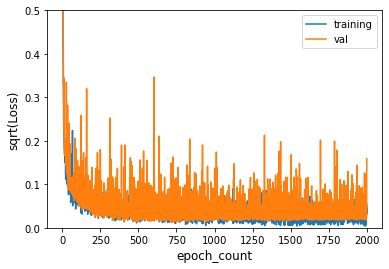

In [10]:
# Plot training process

h = history.history

training_loss = np.array(h["loss"])
test_loss = np.array(h["val_loss"])
epoch_count = np.arange(len(training_loss)) + 1

fig, ax = plt.subplots()
ax.plot(epoch_count, np.sqrt(training_loss), label='training')
ax.plot(epoch_count, np.sqrt(test_loss), label='val')
ax.set_xlabel(r'epoch_count', fontsize=12)
ax.set_ylabel(r'sqrt(Loss)', fontsize=12)
ax.legend(loc=0)
ax.set_ylim(0, 0.5)

In [11]:
# Save model
model.save('data/model2.h5')

## Test

In [5]:
# Test field
model = keras.models.load_model("data/model2.h5")
# Rotation angle
theta = np.linspace(0, 4*np.pi, 151)
B_test = []

for th in theta:
    B_test.append(1 * np.array([np.sin(th), 0, np.cos(th)]))

B_test = np.array(B_test)

In [7]:
V_test = model.predict(B_test)

nf = 15
V_test = np.tanh(V_test/nf)*10

In [11]:
M_ = np.loadtxt('data/lin_cal_mat.csv')
M = np.linalg.inv(M_)
B_predict = []
for V in V_test:
    B_predict.append(np.dot(M, V))

B_predict = np.array(B_predict)

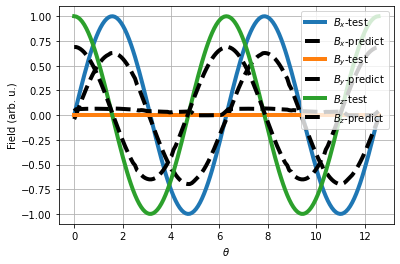

In [12]:
# Plot
fig, ax = plt.subplots()
ax.plot(theta, B_test[:,0], label=r'$B_x$-test', linewidth=4.0)
ax.plot(theta, B_predict[:,0], label=r'$B_x$-predict', linewidth=4.0, color='black', ls='--')

ax.plot(theta, B_test[:,1], label=r'$B_y$-test', linewidth=4.0)
ax.plot(theta, B_predict[:,1], label=r'$B_y$-predict', linewidth=4.0, color='black', ls='--')

ax.plot(theta, B_test[:,2], label=r'$B_z$-test', linewidth=4.0)
ax.plot(theta, B_predict[:,2], label=r'$B_z$-predict', linewidth=4.0, color='black', ls='--')

ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Field (arb. u.)' )
#ax.set_xlim(0,1)
ax.legend(loc=0)
ax.grid()